In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [103]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn.cross_validation import train_test_split
import numpy as np

In [104]:
seds = pd.read_csv('/Users/taotu/Dropbox (LIINC)/DataThon2019/Tao/Datasets/seds.csv')

In [105]:
seds.head(5)

,year,msn,state_name,state_code,description,energy_bin,value,unit
0,1960,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
1,1961,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
2,1962,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
3,1963,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
4,1964,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu


In [106]:
state = 'West Virginia'

In [107]:
coal_price_all = seds[seds["msn"].str.startswith("CL") & seds["msn"].str.endswith('D')]

In [108]:
coal_price = coal_price_all[coal_price_all['state_name']==state].groupby('year').mean()[:-1]['value'].values

# consumption of different energy sources
solar_consumption = seds[seds["msn"].str.startswith("SO") & seds["msn"].str.endswith('B')]
wind_consumption = seds[seds["msn"].str.startswith("WY") & seds["msn"].str.endswith('B')]
hydro_consumption = seds[seds["msn"].str.startswith("HY") & seds["msn"].str.endswith('B')]
geo_consumption = seds[seds["msn"].str.startswith("GE") & seds["msn"].str.endswith('B')]
biomass_consumption = seds[seds["msn"].str.startswith("WW") & seds["msn"].str.endswith('B')]
nuclear_consumption = seds[seds["msn"].str.startswith("NU") & seds["msn"].str.endswith('B')]
coal_consumption = seds[seds["msn"].str.startswith("CL") & seds["msn"].str.endswith('B')]
total_consumption = seds[seds["msn"].str.startswith("TE") & seds["msn"].str.endswith('B')]

# percentage of comsumption relative to total consumption
total = total_consumption[total_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values
solar = solar_consumption[solar_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
wind = wind_consumption[wind_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
hydro = hydro_consumption[hydro_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
geo = geo_consumption[geo_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
biomass = biomass_consumption[biomass_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
nuclear = nuclear_consumption[nuclear_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
coal = coal_consumption[coal_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total

year = np.array(total_consumption[total_consumption['state_name']=='Texas'].groupby('year').sum()[:-1].index)

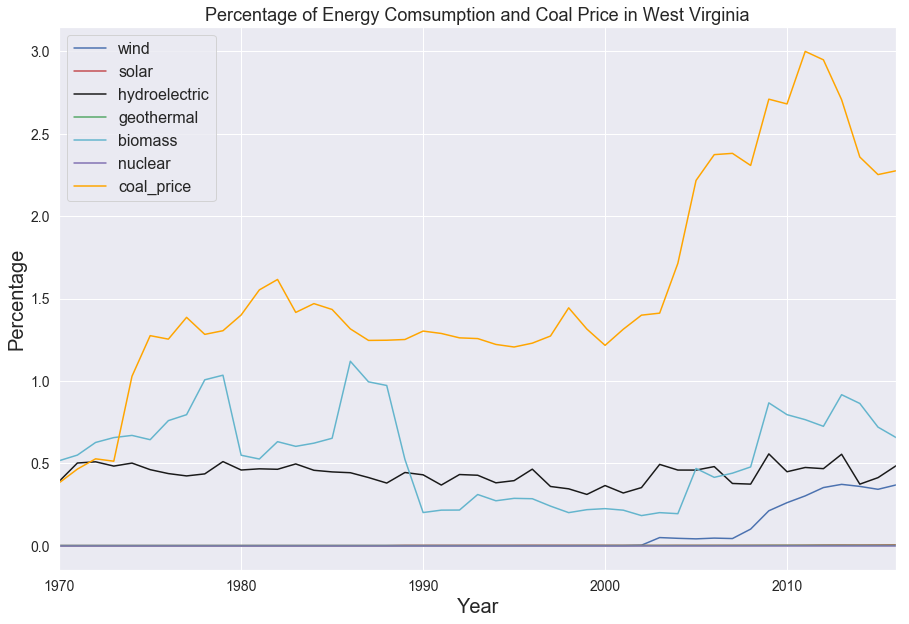

In [110]:
offset_1 = 10
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(year[offset_1:],wind[offset_1:]*100,label="wind")
plt.plot(year[offset_1:],solar[offset_1:]*100,'r',label="solar")
plt.plot(year[offset_1:],hydro[offset_1:]*100,'k',label="hydroelectric")
plt.plot(year[offset_1:],geo[offset_1:]*100,'g',label="geothermal")
plt.plot(year[offset_1:],biomass[offset_1:]*100,'c',label="biomass")
plt.plot(year[offset_1:],nuclear[offset_1:]*100,'m',label="nuclear")
# plt.plot(year,coal*100,'orange',label="coal")
plt.plot(year[offset_1:],coal_price,'orange',label="coal_price")


plt.legend(fontsize=16)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Percentage of Energy Comsumption and Coal Price in West Virginia',fontsize=18)
plt.xlim(1970, 2016)
plt.show()

In [121]:
offset_1 = 20
columns = ['year','coal_price','solar','wind','geo','hydro','biomass','nuclear','coal']
df = pd.DataFrame(columns=columns)
df['year'] = year[offset_1:]
df['coal_price'] = coal_price[offset_1-10:]
df['solar'] = solar[offset_1:]*100
df['wind'] = wind[offset_1:]*100
df['geo'] = geo[offset_1:]*100
df['hydro'] = hydro[offset_1:]*100
df['biomass'] = biomass[offset_1:]*100
df['nuclear'] = nuclear[offset_1:]*100
df['coal'] = coal[offset_1:]*100

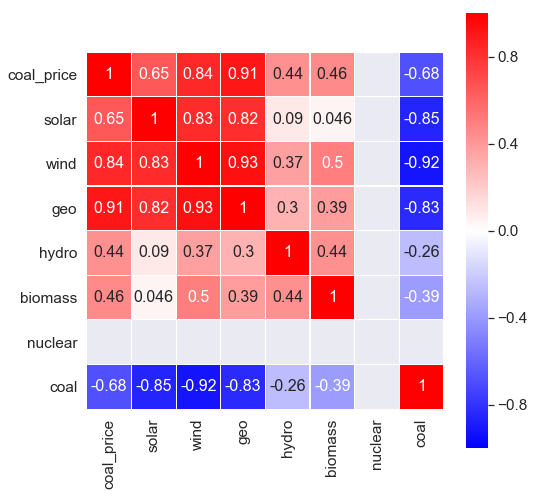

In [123]:
sns.set(font_scale=1.4)
corr = df.drop('year', axis=1).corr() # Exclude the response variable
plt.figure(figsize=(8, 8))
sns.heatmap(corr, 
            cmap='bwr', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 16}, square=True);

In [124]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)


In [125]:
from sklearn.linear_model import Lasso
lm2 = LinearRegression()
X = df[['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear']]
y = df['coal_price']
names = ['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear']
lasso = Lasso(alpha=.01)
lasso.fit(X, y)
  
print(pretty_print_linear(lasso.coef_, names, sort = True))


2.975 * wind + 0.114 * biomass + 0.0 * solar + 0.0 * nuclear + 0.0 * hydro + 0.0 * geo + 0.0 * nuclear


In [127]:
def lassoRegressionPermutationTest(X, y, observed_r2, perm_num = 5000):
# Run PLS with suggested number of components
    n_samples = y.shape[0]
    lasso = Lasso(alpha=.01)
    null_r2_score = []
    null_loadings = []
    for k in range(perm_num):
        lasso.fit(X, y[np.random.permutation(n_samples)])
        y_pred = lasso.predict(X)
#         score_null = r2_score(y, y_pred)
        score_null = np.corrcoef(y, np.squeeze(y_pred))[0][1]*np.corrcoef(y, np.squeeze(y_pred))[0][1]
        null_r2_score.append(score_null)
    print(sum(null_r2_score >= observed_r2))
    p_val = float((sum(null_r2_score >= observed_r2)+1))/perm_num
    
    print(p_val)
    return p_val, null_r2_score

In [128]:
observed_r2 = np.corrcoef(lasso.predict(X), y)[0][1]*np.corrcoef(lasso.predict(X), y)[0][1]
p_val, null_r2_score = lassoRegressionPermutationTest(X, y, observed_r2)

//anaconda/envs/deeplearning/lib/python2.7/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
//anaconda/envs/deeplearning/lib/python2.7/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


28
0.0058


/anaconda/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/anaconda/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  


In [129]:
print(observed_r2)

0.7047172306517056


[Text(0,0.5,'coal price (dollars per million btu)'),
 Text(0.5,0,'percentage of wind consumption'),
 Text(0.5,1,'West Virginia')]

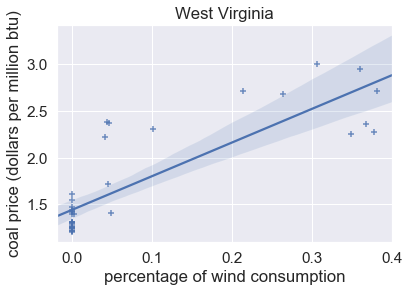

In [130]:
ax = sns.regplot(x=np.arcsin(df['wind']), y=df['coal_price'], marker="+")
ax.set(xlabel='percentage of wind consumption', ylabel='coal price (dollars per million btu)', title='West Virginia')